In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train_data = pd.read_csv('mnist_train_clean.csv', header=None)
test_data = pd.read_csv('mnist_test_clean.csv', header=None)

print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Training Data Shape: (60000, 785)
Test Data Shape: (10000, 785)


In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]
X_test  = test_data.iloc[:,  1:]
y_test = test_data.iloc[:,  0]

X_train = X_train.values.reshape(-1,28,28,1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
X_test = X_test.values.reshape(-1,28,28,1).astype('float32') / 255.0
y_test  = to_categorical(y_test, num_classes=10)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test: ", X_test.shape,  "y_test: ",  y_test.shape)

X_train: (60000, 28, 28, 1) y_train: (60000, 10)
X_test:  (10000, 28, 28, 1) y_test:  (10000, 10)


In [6]:
model = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(10,activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        27,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,210 (106.29 KB)

 Trainable params: 27,210 (106.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.7956 - loss: 0.8141 - val_accuracy: 0.9632 - val_loss: 0.1488
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9549 - loss: 0.1648 - val_accuracy: 0.9755 - val_loss: 0.0956
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9701 - loss: 0.1072 - val_accuracy: 0.9798 - val_loss: 0.0753
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9770 - loss: 0.0828 - val_accuracy: 0.9818 - val_loss: 0.0677
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9807 - loss: 0.0700 - val_accuracy: 0.9837 - val_loss: 0.0633


In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9723 - loss: 0.0837
Test Accuracy: 0.9769


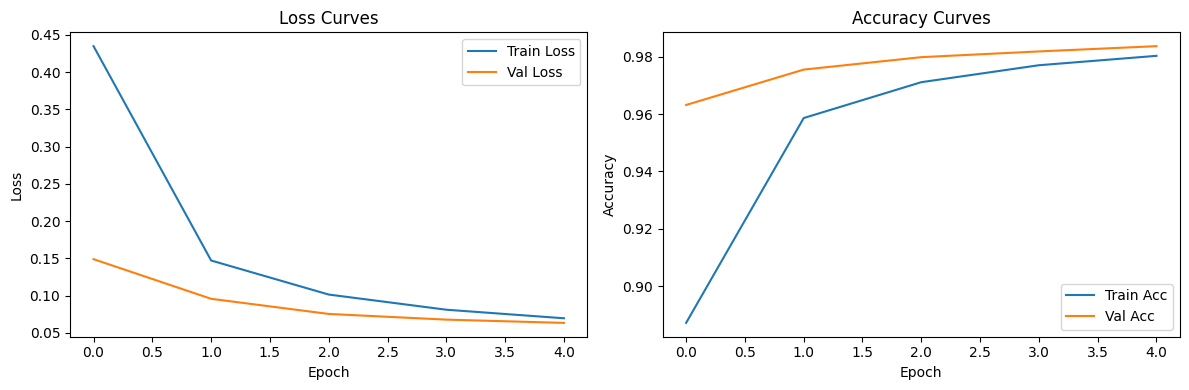

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


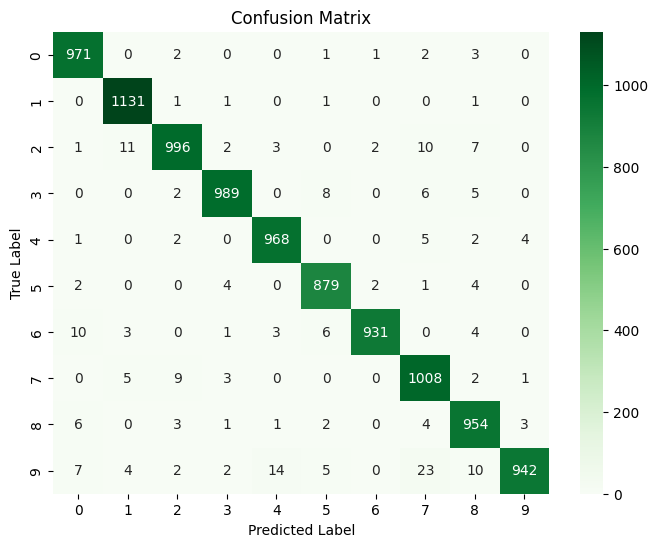

              precision    recall  f1-score   support

           0     0.9729    0.9908    0.9818       980
           1     0.9801    0.9965    0.9882      1135
           2     0.9794    0.9651    0.9722      1032
           3     0.9860    0.9792    0.9826      1010
           4     0.9788    0.9857    0.9822       982
           5     0.9745    0.9854    0.9799       892
           6     0.9947    0.9718    0.9831       958
           7     0.9518    0.9805    0.9660      1028
           8     0.9617    0.9795    0.9705       974
           9     0.9916    0.9336    0.9617      1009

    accuracy                         0.9769     10000
   macro avg     0.9771    0.9768    0.9768     10000
weighted avg     0.9771    0.9769    0.9769     10000



In [10]:
y_pred = model.predict(X_test).argmax(axis=1)
y_true = test_data.iloc[:, 0].values

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(y_true, y_pred, digits=4))

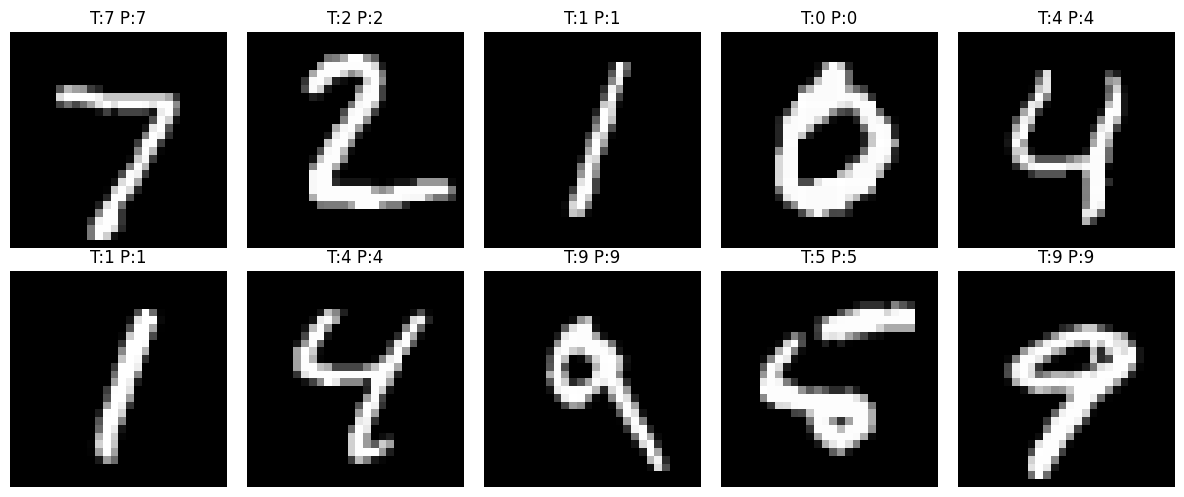

In [11]:
fig, axes = plt.subplots(2,5,figsize=(12,5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_test[i].reshape(28,28), cmap='gray')
    axes[i].set_title(f"T:{y_true[i]} P:{y_pred[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()